In [8]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle

import numpy as np
from matplotlib import pyplot as plt
from neo.io import Spike2IO

from kaveh.behavioral import oculomotor
from kaveh.sorting import spikesorter
from kaveh.toolbox import find_file
from kaveh.plots import axvlines
from smr import File
import os

In [9]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
f_names= [
          '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K48/error_direction/K48_2_CSddirTuning.smr',
         '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K69/error_direction/K69_1_DirTuning.smr',
         '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K69/error_magnitude/K69_1_ErrorSize45degDir.smr',
         '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K16/error_direction/K16_2_directionaltest.smr',
         '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Step/S38/error_direction/S38_1_directionaltuning.smr',
          '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O62/O62_1_FW5R_BW5L_A.smr',
          '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O62/O62_1_pre.smr',
         ]
cs_spiketrain_idx = [1, 1, 2, 0, 1, 2, 0]

In [11]:
f_name = f_names[6]
smr_content = File(f_name)
smr_content.read_channels()
voltage_chan = smr_content.get_channel(0)

Not implemented (type = 6)
Not implemented (type = 5)


In [12]:
sss = spikesorter.SimpleSpikeSorter(voltage_chan.data[0:5000000], voltage_chan.dt)
sss._pre_process()

In [13]:
print('Using minibatch spike detection, batch size = {}s'.format(sss.minibatch_thresh))
delta = np.ceil((sss.signal_size)/np.ceil((sss.signal_size)/np.floor(sss.minibatch_thresh/sss.dt)))
sss.spike_indices = np.array([], dtype='int64')
for i in np.arange(0, sss.signal_size, delta):
    print(i,i+delta)
    curr_indices = sss._detect_spikes_from_range(slice(int(i), int(i + delta)))
    curr_indices = curr_indices + i
    sss.spike_indices = np.concatenate((sss.spike_indices, curr_indices), axis=None)


Using minibatch spike detection, batch size = 50s
(0.0, 2500000.0)
(2500000.0, 5000000.0)


<IPython.core.display.Javascript object>


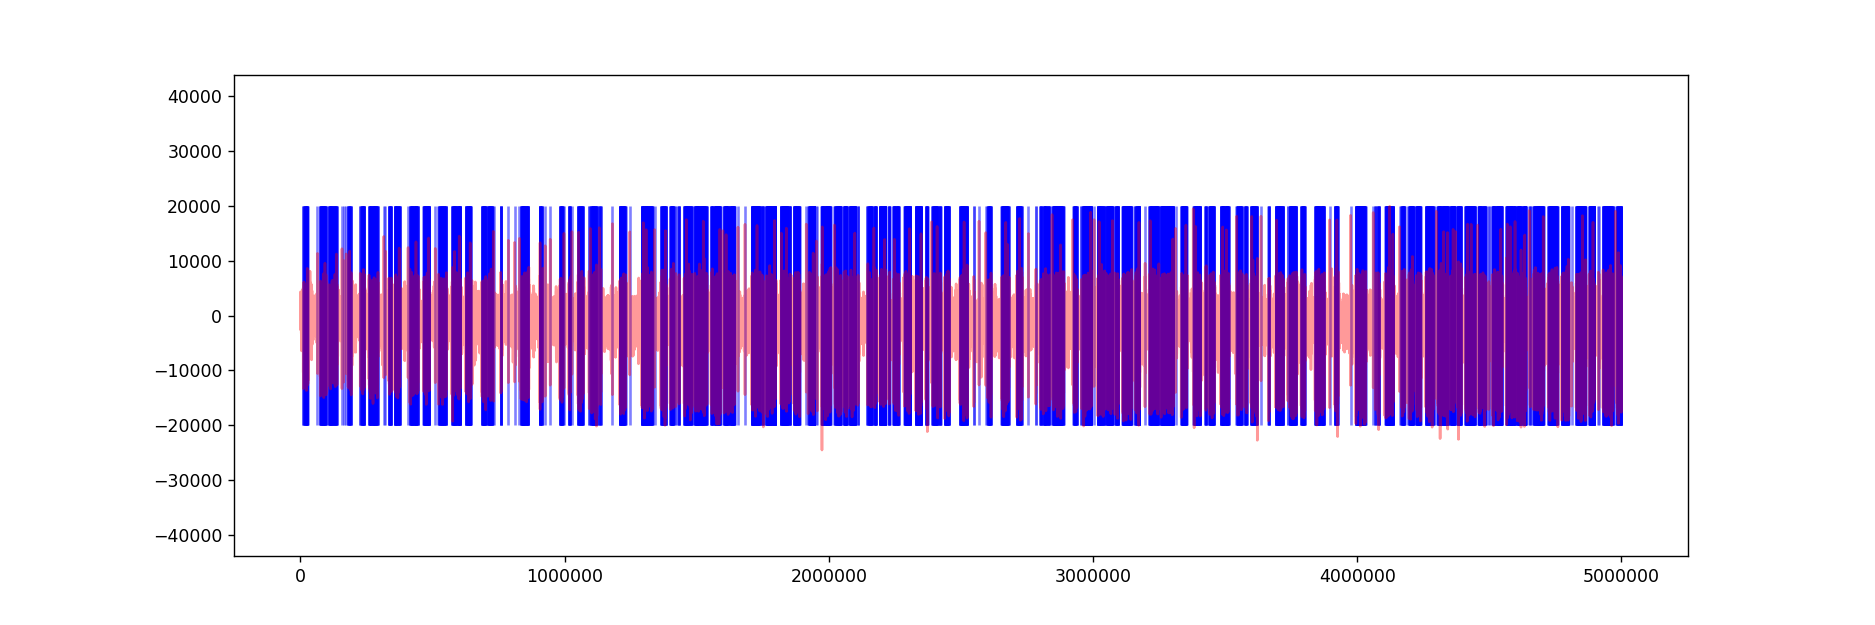

In [14]:
plt.figure(figsize=(15, 5))
# signal = sss.voltage[slice(int(i), int(i + delta))]
# signal_filtered = sss.voltage_filtered[slice(int(i), int(i + delta))]
plt.plot(sss.voltage, alpha = 0.4, color = 'r')
# plt.plot(signal_filtered*0.00005, alpha = 0.4, color = 'g')
plt.eventplot(sss.spike_indices, alpha = 0.5, linelengths=np.max(sss.voltage)*2, colors='b')
plt.show()

In [ ]:
signal = sss.voltage[slice(int(i), int(i + delta))] 
spike_peaks = np.array([np.argmax(signal[max(0, si - int(0.0005/sss.dt)) : si + int(0.002/sss.dt)]) for si in curr_indices])
curr_indices = curr_indices + spike_peaks - int(0.0005/sss.dt)


In [ ]:
max(0,spike_peaks - int(0.0005/sss.dt))

In [ ]:
int(0.0005/sss.dt)

In [ ]:
sss.voltage[slice(i, i+delta)].size

In [ ]:
size = 19000
delta = 9000.0


In [ ]:
d = size/np.ceil(size/delta)

In [ ]:
np.arange(0, size, d)

In [ ]:
18999+d

In [ ]:
a = np.array([1,2,3,4,5,6,7,8])
print(a.size)
print(a[0:3])
print(a[3:6])
print(a[6:a.size])

In [ ]:
a[3:6][1]

In [ ]:
a[3+1]